In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
data = yf.download('BTC-USD','2015-01-01','2023-12-17')

[*********************100%%**********************]  1 of 1 completed


In [29]:
data = pd.DataFrame(data)

In [30]:
data.reset_index(inplace=True)

In [31]:
data.drop(columns = ['Date','Open','High','Low','Adj Close','Volume'], inplace=True)

In [32]:
data

,Close
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
3267,41450.222656
3268,42890.742188
3269,43023.972656
3270,41929.757812


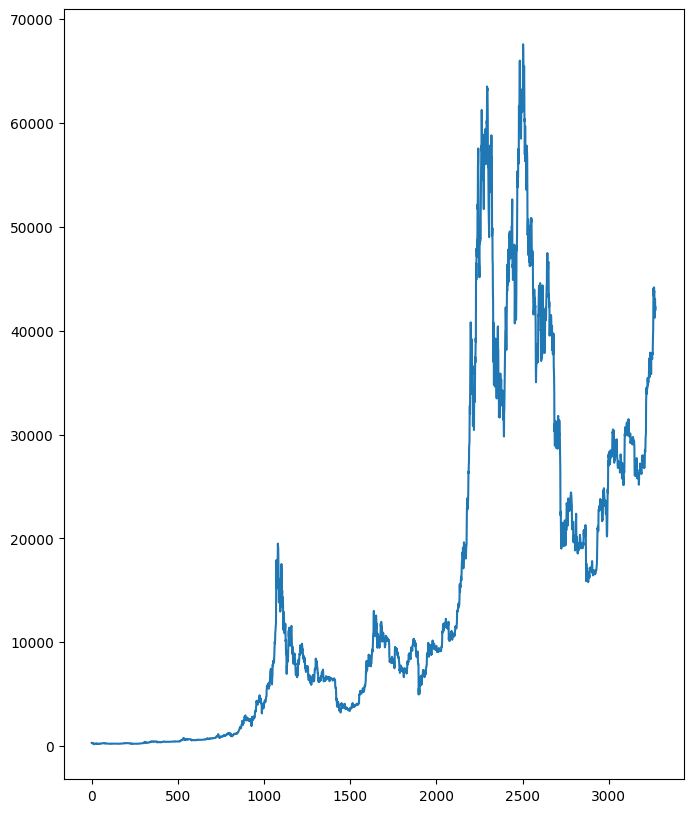

In [33]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show()

In [34]:
train_data = data[:-100]
test_data = data[-100:]

In [35]:
train_data.shape

(3172, 1)

In [36]:
test_data.shape

(100, 1)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [38]:
train_data_scale = scaler.fit_transform(train_data)

In [39]:
base_days = 100

In [40]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [41]:
x, y = np.array(x), np.array(y)

In [42]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [43]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [44]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [46]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [47]:
model.fit(x, y, epochs = 50, verbose =1 )

Epoch 1/50
96/96 [==============================] - 32s 272ms/step - loss: 0.0162
Epoch 2/50
96/96 [==============================] - 25s 265ms/step - loss: 0.0048
Epoch 3/50
96/96 [==============================] - 27s 276ms/step - loss: 0.0048
Epoch 4/50
96/96 [==============================] - 28s 289ms/step - loss: 0.0042
Epoch 5/50
96/96 [==============================] - 24s 251ms/step - loss: 0.0036
Epoch 6/50
96/96 [==============================] - 26s 270ms/step - loss: 0.0040
Epoch 7/50
96/96 [==============================] - 28s 288ms/step - loss: 0.0037
Epoch 8/50
96/96 [==============================] - 29s 301ms/step - loss: 0.0034
Epoch 9/50
96/96 [==============================] - 30s 315ms/step - loss: 0.0035
Epoch 10/50
96/96 [==============================] - 31s 319ms/step - loss: 0.0036
Epoch 11/50
96/96 [==============================] - 30s 315ms/step - loss: 0.0029
Epoch 12/50
96/96 [==============================] - 28s 291ms/step - loss: 0.0034
Epoch 13/50
9

In [48]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [49]:
test_data

,Close
0,27219.658203
1,26819.972656
2,27249.589844
3,27075.128906
4,27119.066406
...,...
195,41450.222656
196,42890.742188
197,43023.972656
198,41929.757812


In [50]:
test_data_scale = scaler.transform(test_data)

In [51]:
x = []
y = []

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [52]:
x, y = np.array(x), np.array(y)

In [53]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [54]:
pred = model.predict(x)

4/4 [==============================] - 1s 68ms/step


In [55]:
pred = scaler.inverse_transform(pred)

In [56]:
pred

array([[25501.668],
       [25513.861],
       [25566.838],
       [25624.188],
       [25616.93 ],
       [25574.023],
       [25558.516],
       [25620.674],
       [25766.266],
       [25956.719],
       [26138.926],
       [26292.926],
       [26445.125],
       [26592.754],
       [26675.916],
       [26675.   ],
       [26606.322],
       [26479.451],
       [26324.463],
       [26169.549],
       [26048.62 ],
       [26026.969],
       [26112.105],
       [26271.904],
       [26540.373],
       [26850.36 ],
       [27116.967],
       [27320.729],
       [27425.865],
       [27476.05 ],
       [27508.518],
       [27537.477],
       [27535.389],
       [27480.61 ],
       [27344.006],
       [27135.295],
       [26903.818],
       [26698.902],
       [26573.803],
       [26659.04 ],
       [26954.035],
       [27358.06 ],
       [27786.238],
       [28246.566],
       [28723.973],
       [29168.865],
       [29794.193],
       [30694.412],
       [31821.617],
       [32944.58 ],


#Future Bitcoin Price

In [57]:
m = y
z= []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)


1/1 [==============================] - 0s 66ms/step


In [58]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [59]:
z

array([[42900.54259583],
       [43139.93678481],
       [43497.28081203],
       [43916.06800887],
       [44353.17930453],
       [44784.26959533],
       [45199.13651149],
       [45595.83999606],
       [45975.56095326],
       [46340.35592378],
       [46692.4300655 ],
       [47033.76761885],
       [47365.98730627],
       [47690.38249906],
       [48007.41109885],
       [48316.98473867],
       [48618.81421747],
       [48912.55811737],
       [49197.79468687],
       [49474.15037462],
       [49741.18334572],
       [49998.55619896],
       [50245.91546641],
       [50483.07638074],
       [50709.87425803],
       [50926.29303155],
       [51132.38491817],
       [51328.26640162],
       [51514.15839937],
       [51690.28182888]])

In [60]:
model.save('Bitcoin_Price_Prediction_Model.keras')